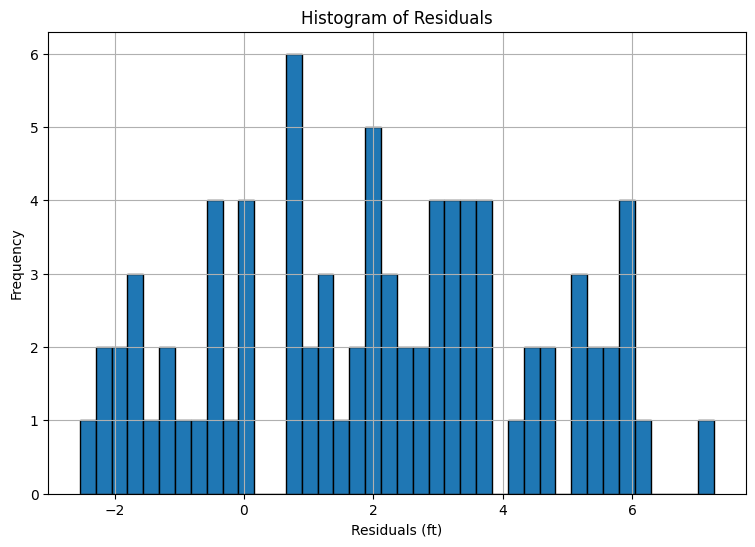

2.417475122441505

In [42]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#Read the datafile
file_path = 'ASTR19_S22_group_project_data.txt'

#Processes data
infile = open(file_path, 'r')
lines = infile.readlines()

#Extract the "day, time, and height information"
days = np.array([])
time = np.array([])
height = np.array([])
for line in lines:
    sline = line.strip().split()
    if len(sline) == 3:  # to make sure only valid lines with three elements are processed here :)(not sure if i have to use it)
        days = np.append(days, sline[0])
        time = np.append(time, sline[1])
        height = np.append(height, sline[2])
infile.close()

# Convertcdatas to appropriate types
fDays = days.astype(float)
fHeight = height.astype(float)
fHours = np.array([])

# Convert time to "day"
for i in time:
    splitTime = i.split(':')
    hoursMinutes = float(splitTime[0]) + (float(splitTime[1])/60.0)
    hoursMinutes = hoursMinutes/24
    fHours = np.append(fHours, hoursMinutes)

# Combine days and time
dayMinutes = np.array([])
for i in range(len(fDays)):
    dayTime = fDays[i] + fHours[i]
    dayMinutes = np.append(dayMinutes, dayTime)

# Oscillatory function
def oscillatory_function(x, a, b, c, d, E):
    return ((np.cos((a * x) + b)) + (E * np.cos((c * x) + d)))

y_err = 0.25
params, params_covariance = curve_fit(oscillatory_function, dayMinutes, fHeight, sigma=y_err*np.ones(len(fHeight)))

#residuals
residuals =fHeight-oscillatory_function(dayMinutes, *params)

# Plot
plt.figure(figsize=(9, 6))
plt.hist(residuals, bins=40, edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.savefig('histogram')
plt.show()

std_dev = np.std(residuals)
std_dev


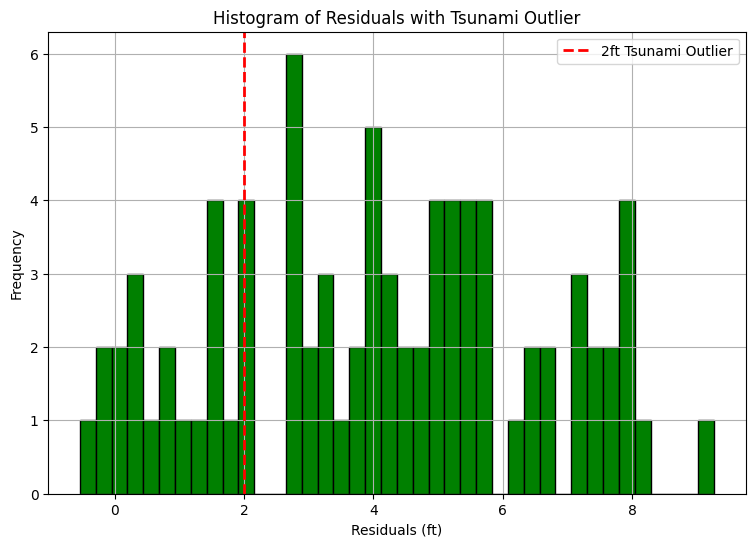

0.8273094442354053

In [43]:

# Add 2ft outlier
fHeight = height.astype(float)

residuals_tsunami = fHeight+2-oscillatory_function(dayMinutes, *params)

# Plot
plt.figure(figsize=(9, 6))
plt.hist(residuals_tsunami, bins=30, edgecolor='black', color='green')
plt.axvline(x=2, color='red', linestyle='dashed', linewidth=2, label='2ft Tsunami Outlier')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')

plt.title('Histogram of Residuals with Tsunami Outlier')
plt.legend()
plt.grid(True)
plt.savefig('histogram_outlier')
plt.show()

tsunami_deviation_std = 2 / std_dev
tsunami_deviation_std